In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

In [42]:
## Load the dataset
data = pd.read_csv("annclassification\Churn_Modelling.csv")
data.head()

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\vince\AppData\Local\Temp\ipykernel_14176\2021254868.py:2: SyntaxWarning: invalid escape sequence '\C'
  data = pd.read_csv("annclassification\Churn_Modelling.csv")


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
## Preprocess the data
### Drop irrelevant columns

data = data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1) ## axis = 1 for rows
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
## Encode categorical variables
## Problem: The model might think 1 > 0, implying order, which isn’t true for gender.

label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])

## fit(): Learns the unique value ('Female' → 0 'Male' → 1)
## transform(): Applies the mapping

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [45]:
## One Hot Encoding "Geography"

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder_geo = OneHotEncoder()
geo_encoder = one_hot_encoder_geo.fit_transform(data[["Geography"]])

## double square bracket to get a 2D table, not a series. 2D table has columns name
## while series only shows all value

geo_encoder

# the output is a sparse matrix

<10000x3 sparse matrix of type '<class 'numpy.float64'>'
	with 10000 stored elements in Compressed Sparse Row format>

In [46]:
one_hot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [47]:
## transform sparse matrix into array so the machine could understand

geo_encoded_df = pd.DataFrame(geo_encoder.toarray(), columns=one_hot_encoder_geo.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [48]:
## Combine one hot encoder columns with the original data
data = pd.concat([data.drop('Geography', axis = 1), geo_encoded_df], axis = 1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


Pickle file is used to keep the objects in their current state before being used for another process, so that you can use it again later

In [49]:
## Save the encoders and scaler into pickle file

with open('label_encoder_gender.pkl', 'wb') as file:
    pickle.dump(label_encoder_gender, file)

with open('one_hot_encoder_geo.pkl', 'wb') as file:
    pickle.dump(one_hot_encoder_geo, file)

Dependent columns (label) = exited, the rest is independent. Dependent variables are the target variable, while independent variable affect the output of dependent variable (features) and used to predict or understand the outcome

A scaler is a tool that standardizes or normalizes numerical features in your dataset so they are on the same scale.

In raw datasets, features can have very different ranges — e.g., "Age" might range from 18–70, but "Income" could range from $10,000 to $1,000,000. If left unscaled, features with larger values can dominate others, which can lead to poor model performance.

fit() is used to find the mean and standard deviation
transform() uses the mean and standard deviation that has been count in fit() to the formula

fit() is may only used in training dataset, while transform() is used in both. the reason why fit() is not allowed to be used in testing dataset is because that the data is supposed to represent new, future, unseen data.

If you use fit() on X_test, your model is secretly seeing test data patterns — this is called data leakage.

the test will use the mean and standard deviation from the training, and make an assumption on the upcoming data input based for the formula

X' = X - mean_train/std_train

In [50]:
## Divide the dataset into independent and dependent features

X = data.drop('Exited', axis = 1)
y = data['Exited']

## Split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Scale these features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [52]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [53]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


### ANN Implementation

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

We make it a tuple because many Python libraries expect input shapes to be passed as a tuple, even if it only contains one number.

In [55]:
## Show the number of columns (features) in tuple
(X_train.shape[1],)

(12,)

In Keras’ Sequential model, you don’t need to define a separate input layer explicitly. The input is automatically created when you define input_shape in the first layer.

We use ReLU in hidden layers to avoid the vanishing gradient problem. ReLU cut the output if it's negative and doesn't count it for the next step. the value for ReLU ranged from 0 to 1

while sigmoid would count all the input and if the parameters are too much, the value could be very small and occur vanishing gradient problem

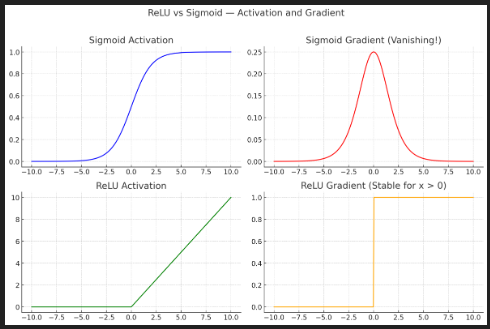

Top row (Sigmoid):
Left: Sigmoid activation flattens near -10 and 10.
Right: Its gradient (derivative) becomes very small at both ends → this is the vanishing gradient problem.

Bottom row (ReLU):
Left: ReLU is 0 for negative values, and grows linearly for positive ones.
Right: Its gradient is 0 for 𝑥 < 0, and a steady 1 for 𝑥 > 0 → no vanishing gradient for positive values.

In [56]:
## Building the ANN Model
model = Sequential([
    Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)), ## First hidden layer connected with input layer
    Dense(32, activation = 'relu'), ## Second hidden layer
    Dense(1, activation = 'sigmoid') ## Output layer
    ]
)

c:\Users\vince\Code\venv1\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

Optimizer is an algorithm that adjusts the weights (parameters) of the model in order to minimize the loss function.

Adam adapts the learning rate for each parameter individually, which makes it powerful and fast-converging.

Learning rate controls how much the model's weights are updated during training. It's the step size used by the optimizer to move the model's weights in the direction that reduces the loss.

The learning rate should be in smooth and fast steps. If it's too small it will has very slow training. while if it's too bog it will become unstable because it's taking too much step that will skip over good number of loss and might go too far to the bottom (overshoot). Overshoot happens because instead of getting closer to the minimum, it fly past it and become bouncy and will not find the bottom.

Binary Cross-Entropy (BCE), also known as log loss, is a fundamental loss function used in binary classification problems where the output can be one of two classes. It measures the difference between predicted probabilities and true binary labels, penalizing incorrect classifications more heavily when the model is confident but wrong.

When we say BCE "penalizes" incorrect predictions, we mean it assigns a higher loss value to mistakes, which directly impacts how the model learns during training. The term "penalty" reflects how severely the loss function "punishes" the model for being wrong, especially when it's overly confident in its mistakes.

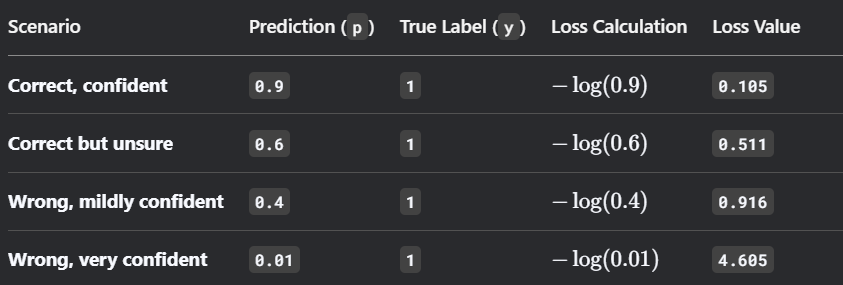

This penalization will affect the model training by:
1. High penalty will give larger gradient and make the model having bigger update to weights, it will force the model to adjust its weights significantly to avoid repeating the mistake
2. Avoiding overconfidence (Fails to account for uncertainty, leading to poor generalization on new data.)
3. Handling Class Imbalance. In imbalanced datasets (e.g., 95% class 0, 5% class 1), BCE prevents the model from blindly favoring the majority class because wrong predictions on the rare class would incur massive penalties.

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001, weight_decay=1e-5)
loss = tf.keras.losses.BinaryCrossentropy()

In [74]:
## Compile the model
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ['accuracy'])

In [75]:
## Set up the Tensorboard
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir = log_dir, histogram_freq = 1)

In [76]:
## Set up early stopping

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

In [77]:
## Train the model
history = model.fit(
    X_train, y_train, validation_data = (X_test, y_test), epochs = 100,
    callbacks = [tensorflow_callback, early_stopping_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8559 - loss: 0.3424 - val_accuracy: 0.8625 - val_loss: 0.3350
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8612 - loss: 0.3308 - val_accuracy: 0.8630 - val_loss: 0.3343
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8637 - loss: 0.3250 - val_accuracy: 0.8660 - val_loss: 0.3338
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8639 - loss: 0.3258 - val_accuracy: 0.8650 - val_loss: 0.3336
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.3214 - val_accuracy: 0.8660 - val_loss: 0.3335
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8639 - loss: 0.3175 - val_accuracy: 0.8670 - val_loss: 0.3336
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8621 - loss: 0.3240 - val_accuracy: 0.8670 - val_loss: 0.3334
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8697 - loss: 0.3192 - val_accu

In [69]:
model.save('model.h5')

In [78]:
## load tensorboard extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [79]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 9056), started 4:15:37 ago. (Use '!kill 9056' to kill it.)